In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from start_line.plotting import *
from start_line.utils import *

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [4]:
style_size = 'presentation'

## Bar Chart

In [5]:
np.random.seed(42)
models = ["Tinyllama","Tinyllama-CT","Rho-1-1B"]
datasets = ["MMLU","BBH","MATH","GSM8k","MBPP(p@1)","MBPP(p@10)","HumEval(p@1)","HumEval(p@10)"]

n_models = len(models)
n_datasets = len(datasets)

values = np.random.random((n_models,n_datasets))
more_amount = [.113,.039,0.05,.282,.065,.078,.069,.106]
error = [i/10 for i in more_amount]
values[-1,:] = np.max(values[:2,:],axis=0) + np.array(more_amount)
matrix_0_1 = np.random.randint(0,2,(3,n_datasets))


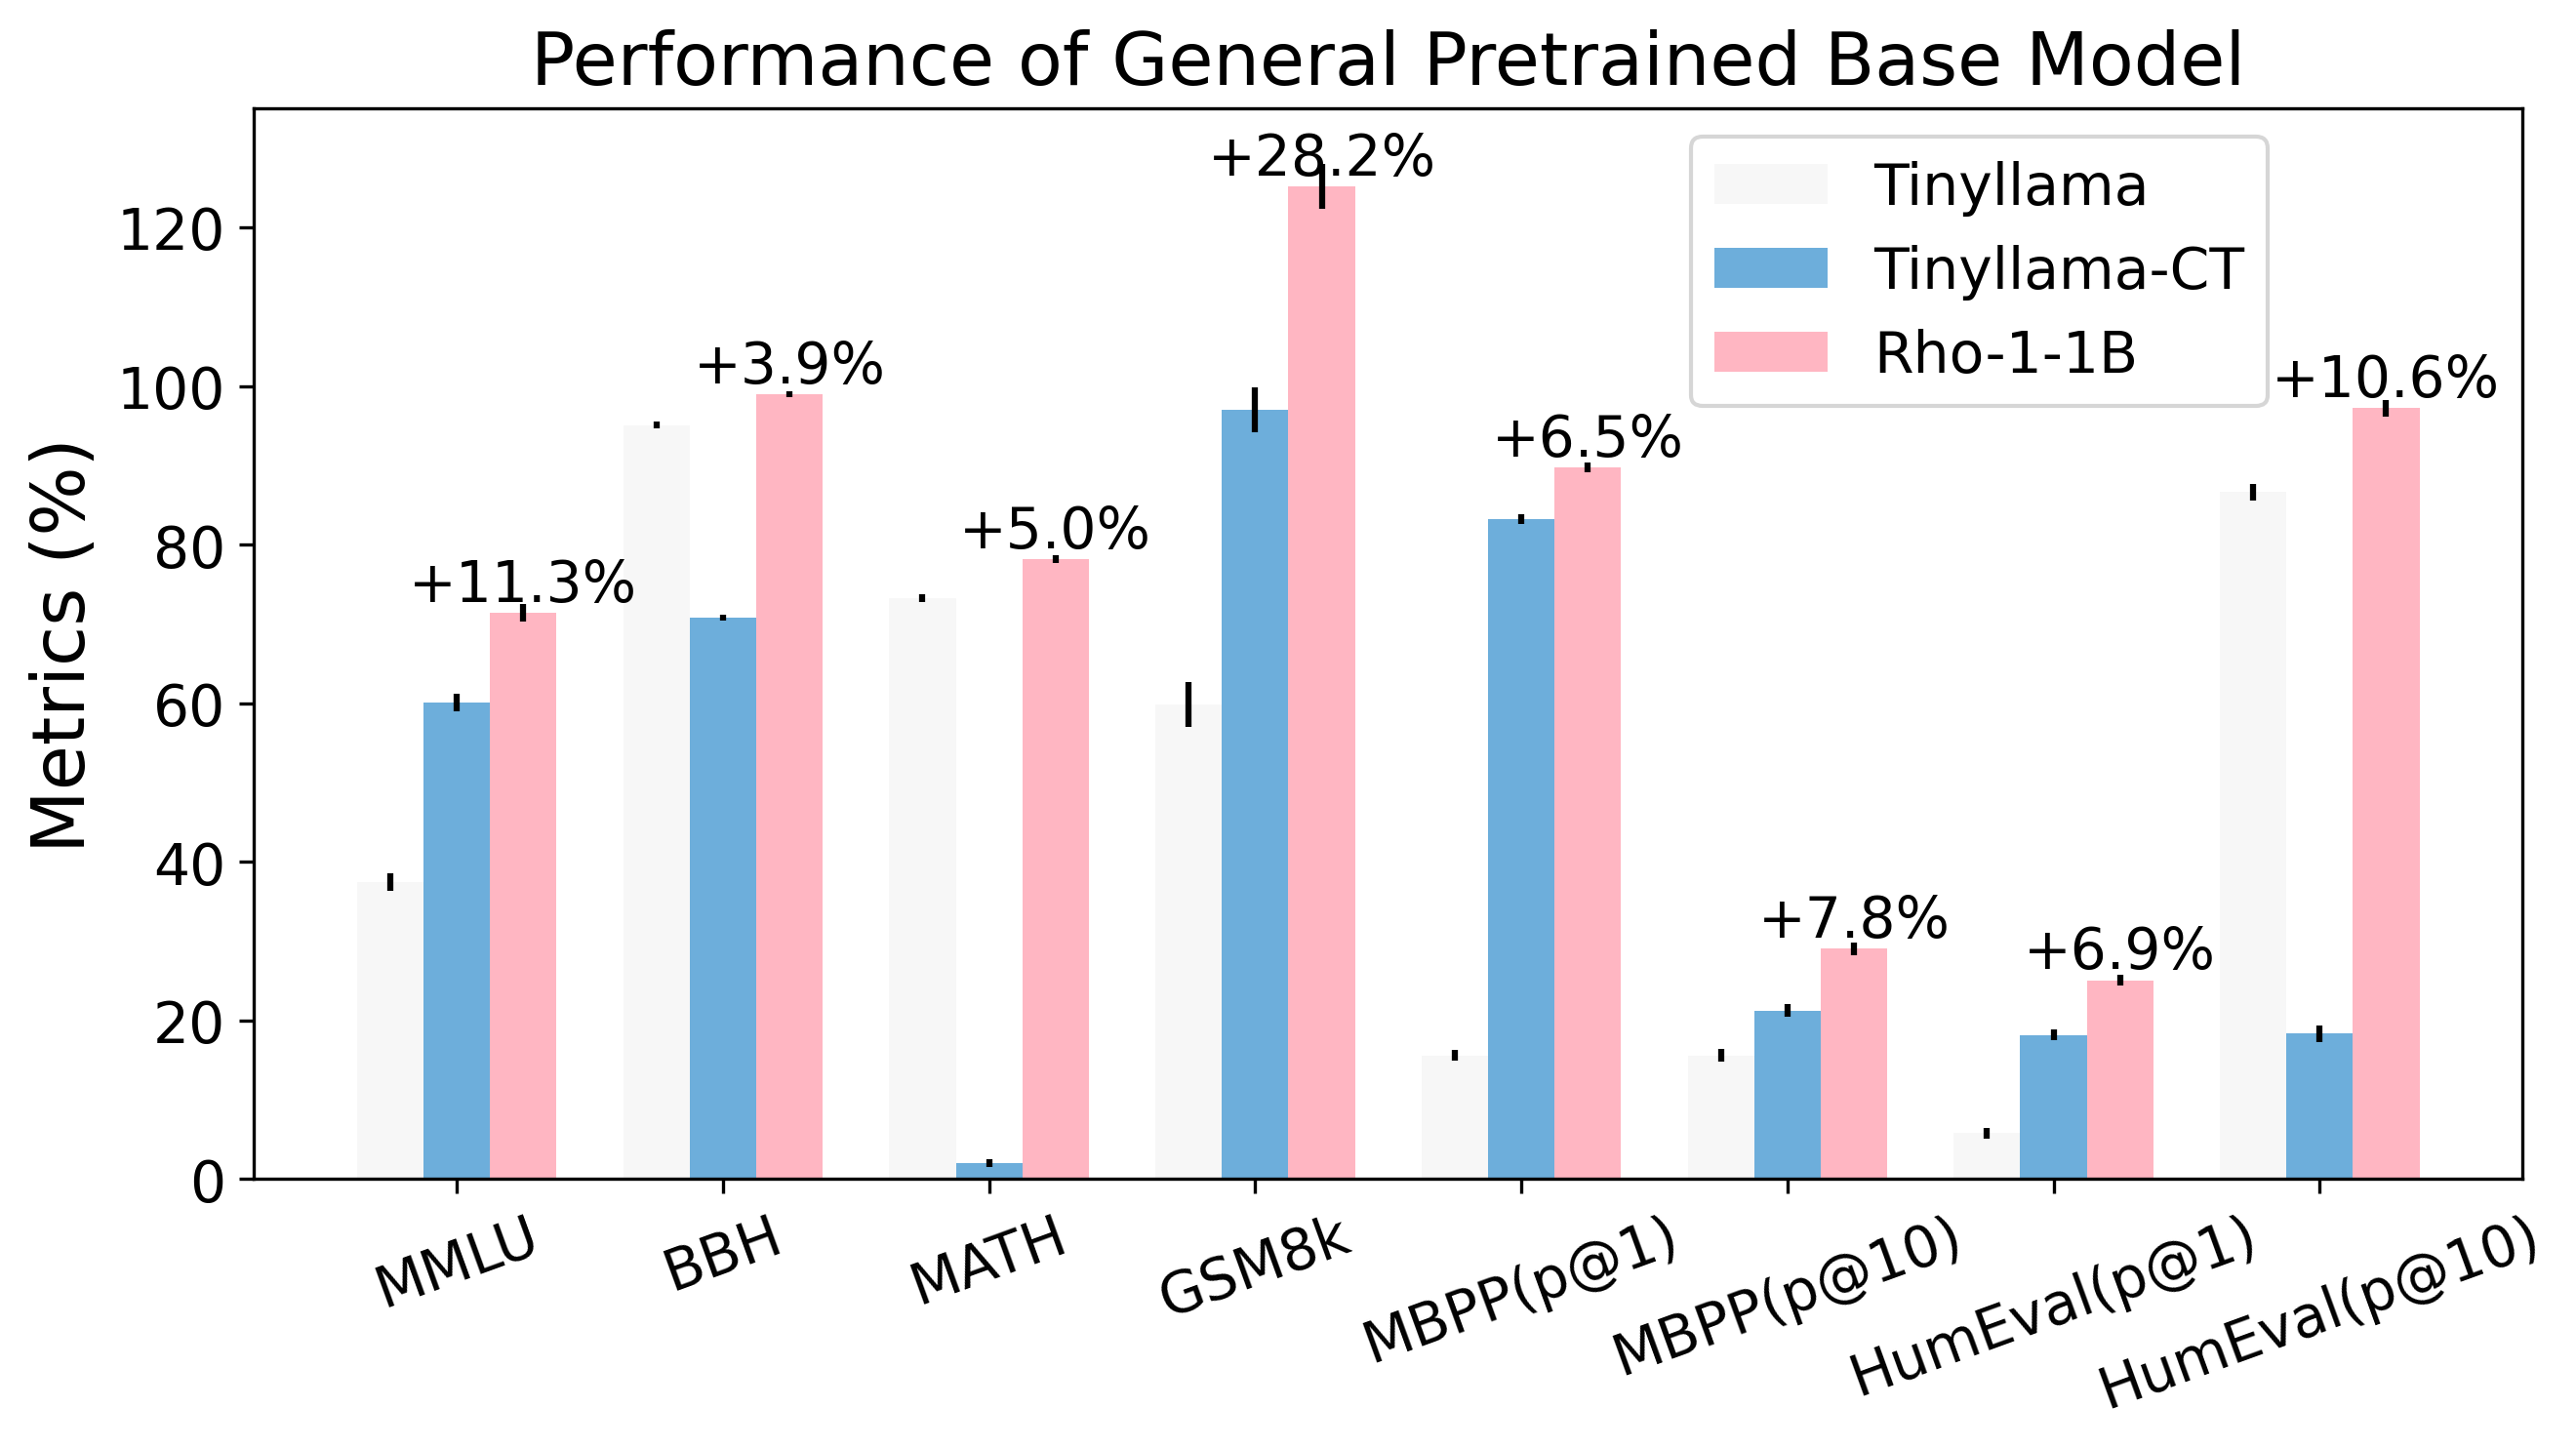

In [7]:
plot_dimensions = (1,1)
y_labels = [["Metrics (%)"]]
titles = [["Performance of General Pretrained Base Model"]]

if style_size == 'paper':
    figsize = (10,4.75)
elif style_size == 'presentation':
    figsize = (10/2,4.75/2)

overall_format = {'figsize':(10, 4.75),
    'style_size': style_size,
    'y_lim': [[[0,1.35]]], 
    'y_ticks': [[[[0,0.2,0.4,0.6,0.8,1.0,1.2],[0,20,40,60,80,100,120]]]]
}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles)

bar_format = {'style_size': style_size,
    'color_palette': 'three_color_america', 
'per_group_labels': datasets, 
'extra_labels': {
    2: more_amount
}, 
'format_string': lambda s: '+'+str(round(s*100,1))+'%'}
x_groups = np.array([list(range(len(models))) for i in range(len(datasets))]).flatten()
y_values = values.T.flatten()
y_errors = [error[i//3] for i in range(len(y_values))]
labels = models
plot_bar(ax[0][0],x_groups,y_values,y_errors,labels,bar_format)

legend_format = {'style_size': style_size,'type': 'is_local', 'loc': 'upper right', 'ncol': 1, 'bbox_to_anchor': (0.9,1.0)}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')


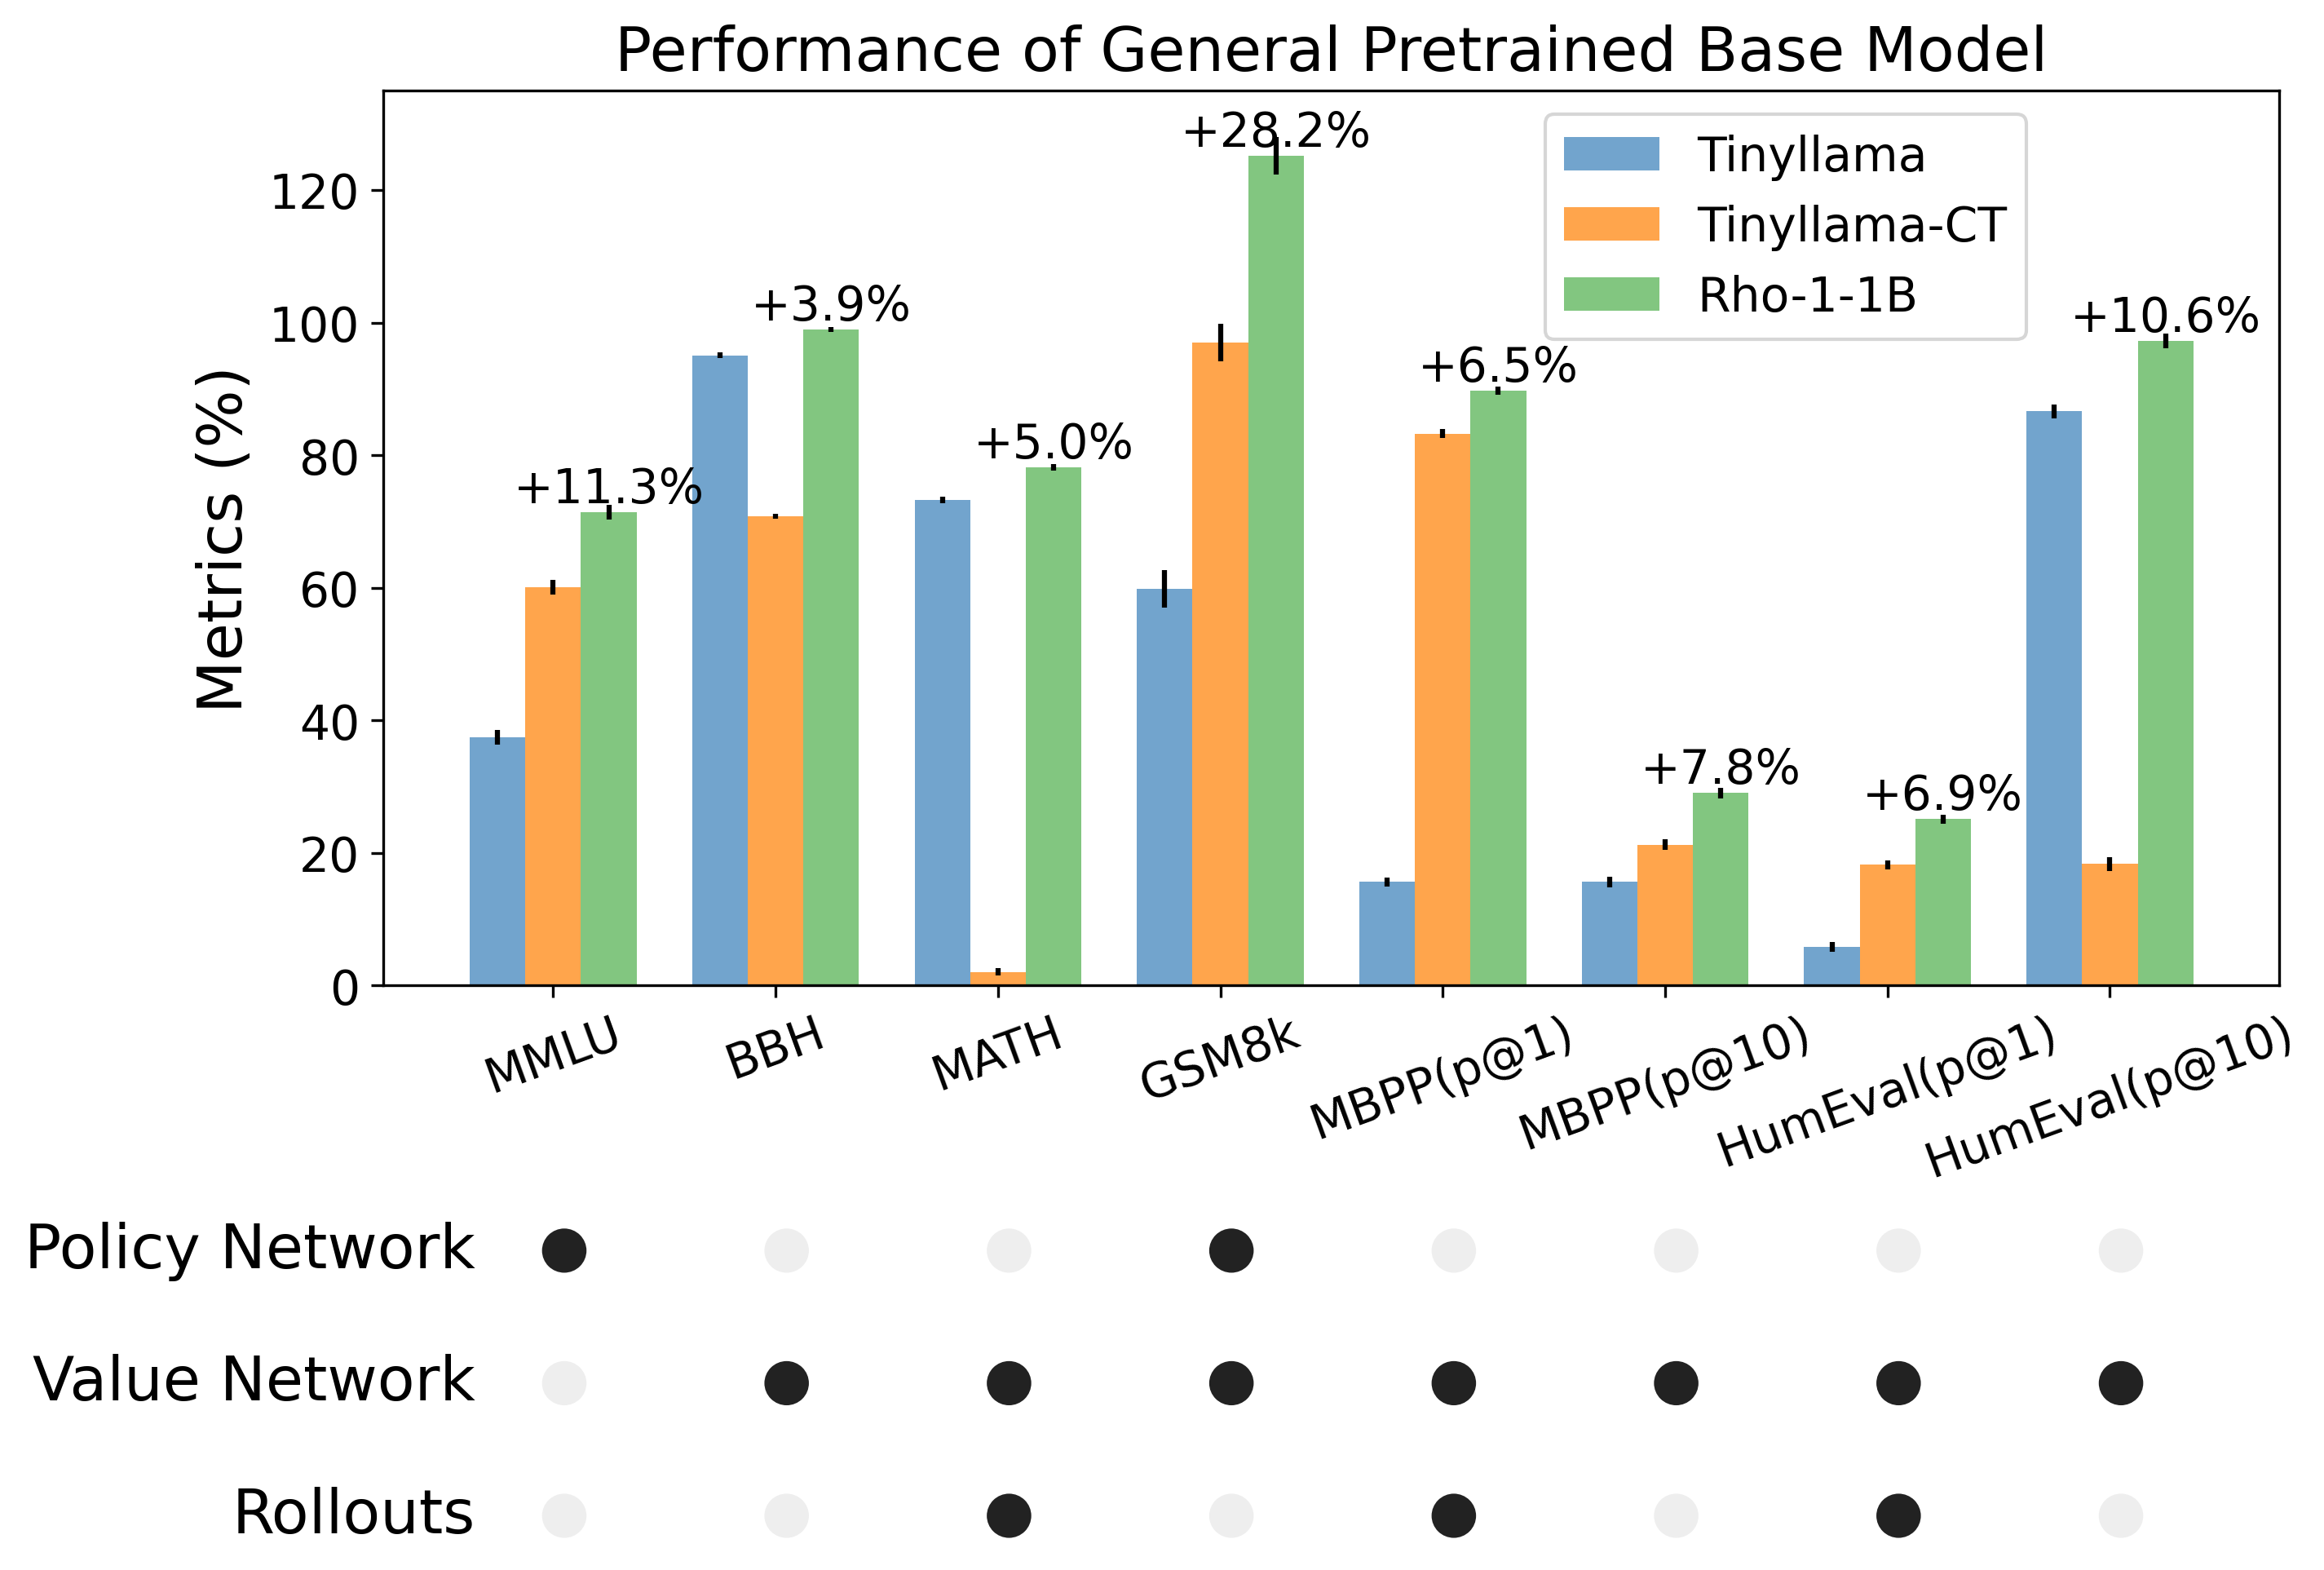

In [8]:
plot_dimensions = (1,1)
y_labels = [["Metrics (%)"]]
titles = [["Performance of General Pretrained Base Model"]]
overall_format = {'figsize':(10, 4.75),
    'style_size': style_size,
    'y_lim': [[[0,1.35]]], 
    'y_ticks': [[[[0,0.2,0.4,0.6,0.8,1.0,1.2],[0,20,40,60,80,100,120]]]], 
}
fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles)

bar_format = {'style_size': style_size,
    'color_palette': 'six_color', 
'per_group_labels': datasets, 
'extra_labels': {
    2: more_amount
}, 'format_string': lambda s: '+'+str(round(s*100,1))+'%'}
x_groups = np.array([list(range(len(models))) for i in range(len(datasets))]).flatten()
y_values = values.T.flatten()
y_errors = [error[i//3] for i in range(len(y_values))]
labels = models
plot_bar(ax[0][0],x_groups,y_values,y_errors,labels,bar_format)

legend_format = {'style_size': style_size,'type': 'is_local', 'loc': 'upper left', 'ncol': 1, 'bbox_to_anchor': (0.6,1)}
create_legend(fig,ax,plot_dimensions,legend_format)

matrix_format = {
    'style_size': style_size,
    'x_start': 0.3, 
    'x_width': 1,
    'label_x': -0.1, 
    'y_start': -0.8, 
    'y_width': 0.2, 
    'circle_width': 0.6/3,
    'circle_height': 0.2/3 
}
plot_zero_one_matrix(ax[0][0],matrix_0_1,['Rollouts','Value Network','Policy Network'],matrix_format)

fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')

In [9]:
all_games = ["Star Gunner", "Robotank", "Atlantis", "Crazy Climber", "Gopher", "Demon Attack", "Name This Game", "Krull","Assault","Road Runner"]
blue_scores = [598,508,449,419,400,294,278,277,246,232]
grey_scores = [np.random.random()*i for i in blue_scores]
colors = ["#38bae2","#4eb156"]
y_positions = np.arange(len(all_games))/4  # Position for each bar group
y_positions = y_positions[::-1]


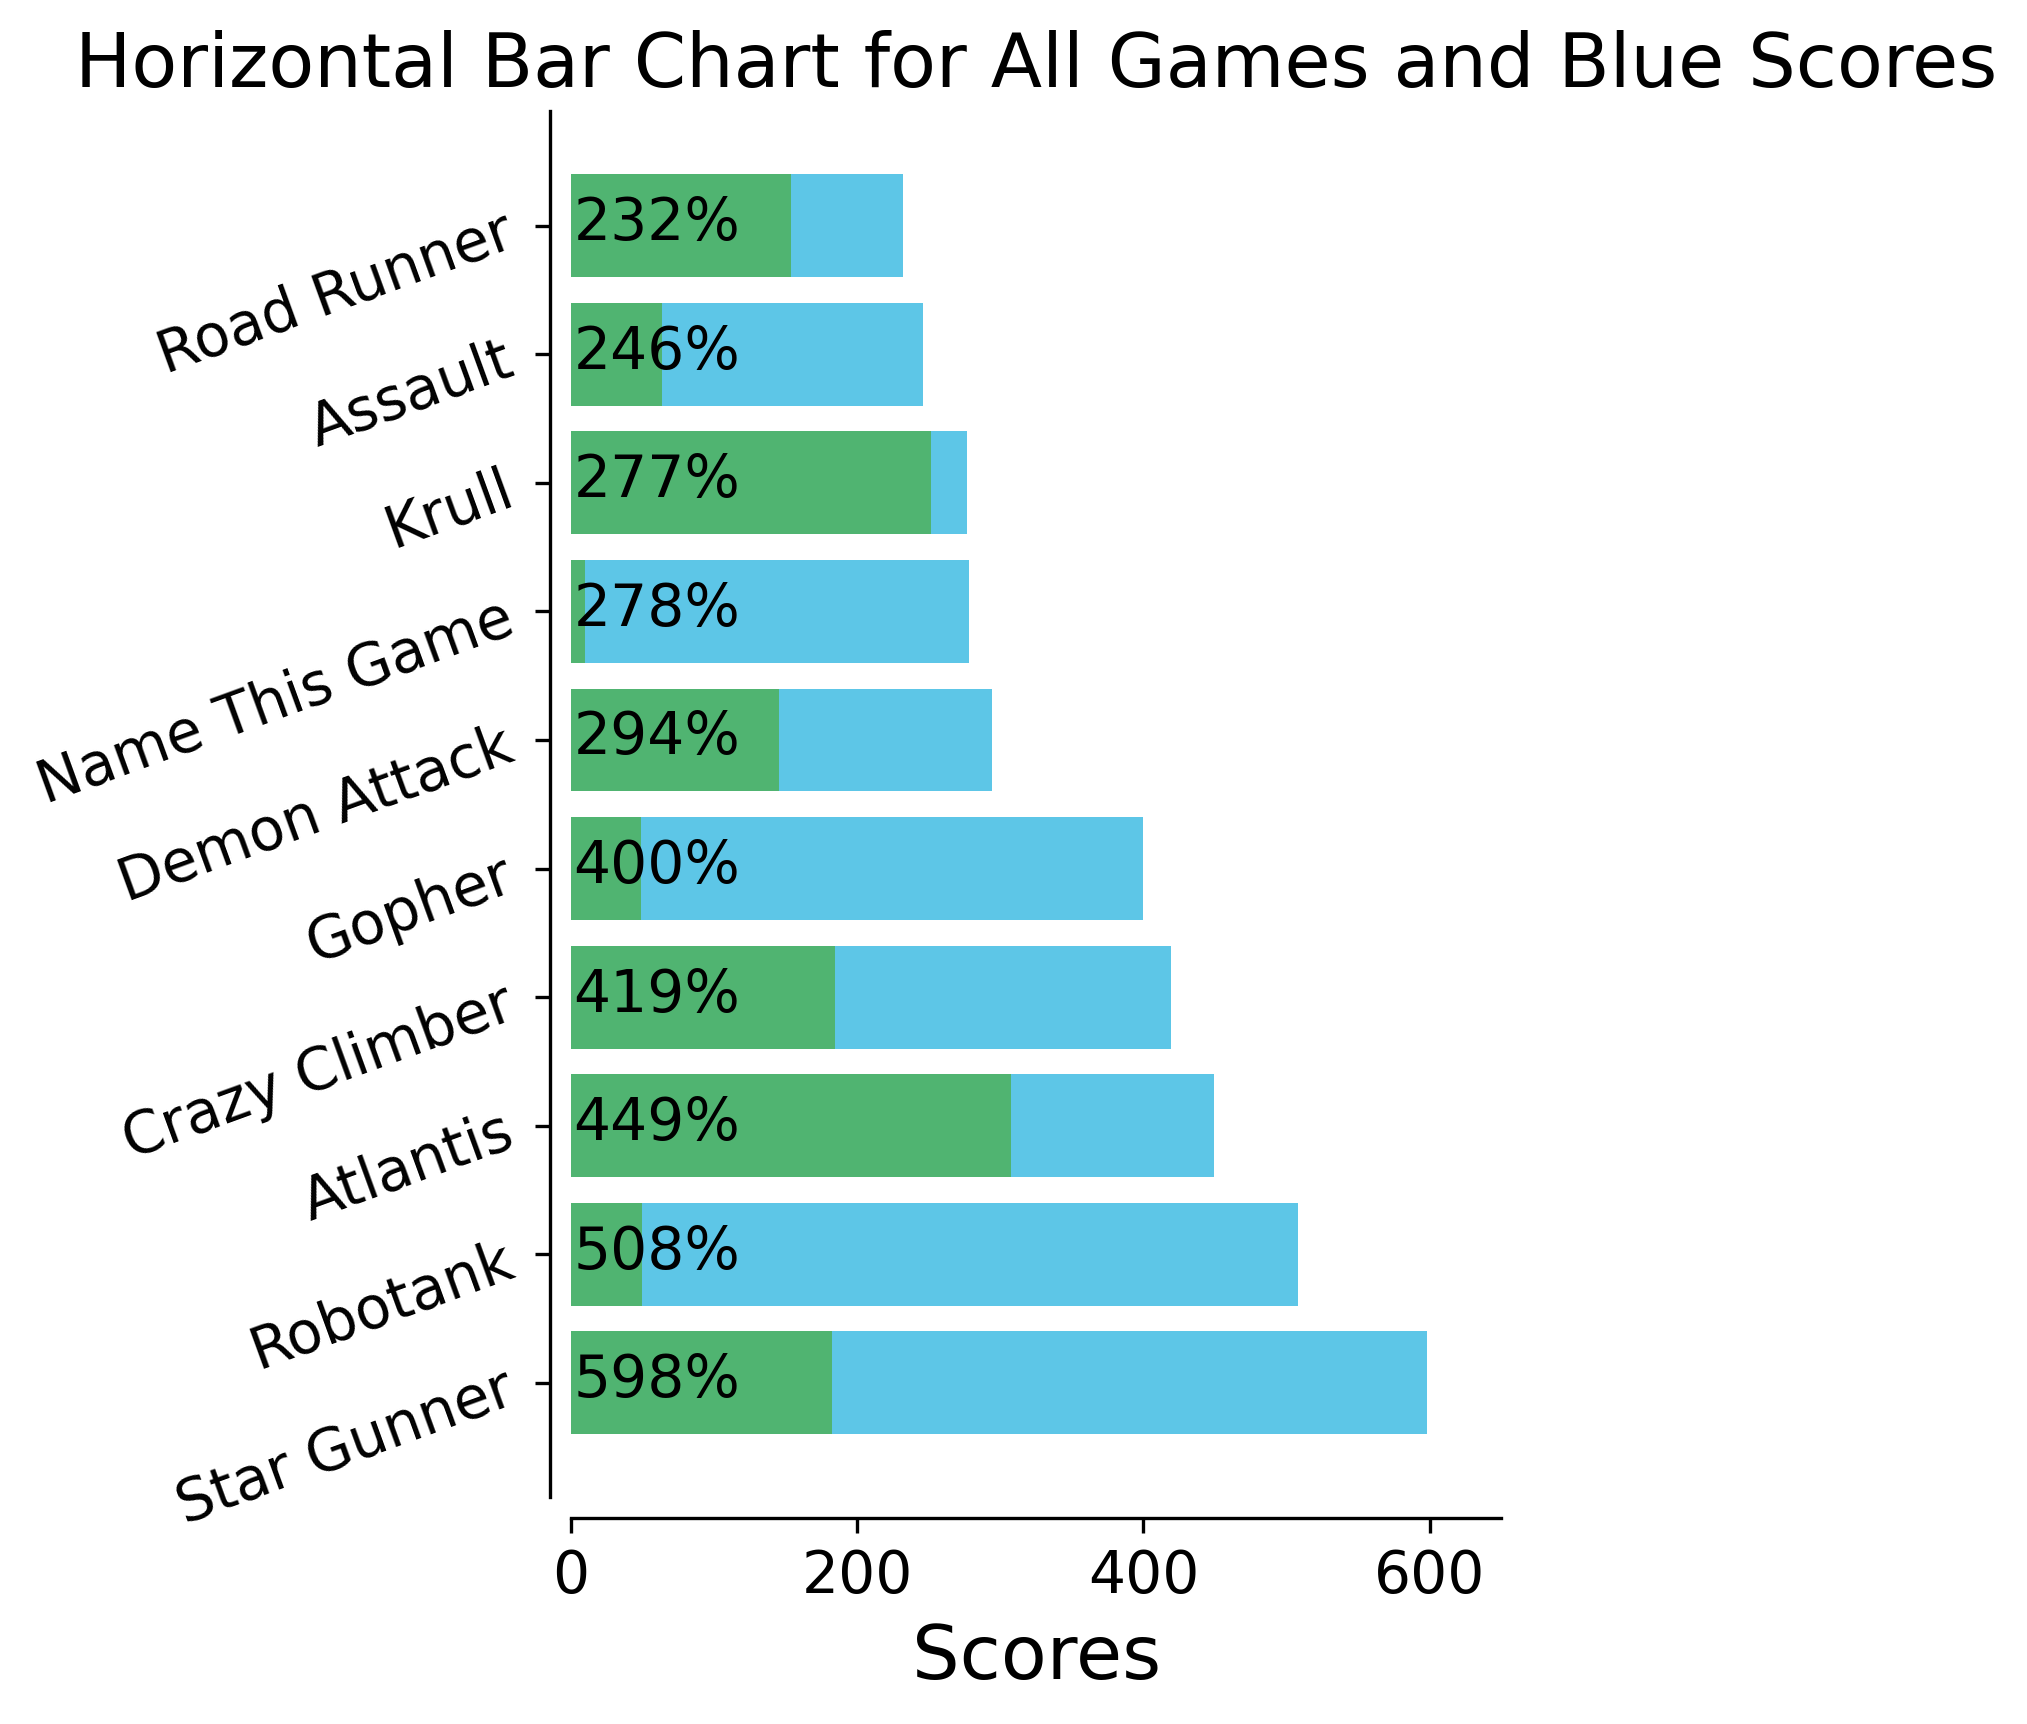

In [10]:
plot_dimensions = (1,1)
x_labels = [["Scores"]]
titles = [["Horizontal Bar Chart for All Games and Blue Scores"]]
overall_format = {'figsize':(4,6),
    'style_size': style_size,
    'x_lim': [[[0,650]]], 
    'x_ticks': [[[[0,200,400,600],[0,200,400,600]]]], 
    'hide_spines': True, 
    'separate_spines': True, 
}
fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,titles=titles)

bar_format = {'style_size': style_size,
    'color_palette': '#38bae2d0', 
'per_group_labels': all_games, 
'horizontal': True, 
'bar_width': 0.8, 
'extra_labels': {1: blue_scores}, 
'extra_x_shift': 60, 
'extra_y_shift': -0.2,
'format_string': lambda s: str(s)+'%'
}
x_groups = [1 for i in range(len(y_positions))]
y_values = blue_scores
y_errors = [0 for i in range(len(y_values))]
labels = models
plot_bar(ax[0][0],x_groups,y_values,y_errors,labels,bar_format)

del bar_format['extra_labels']
bar_format['color_palette'] = '#4eb156d0'
y_values = grey_scores
plot_bar(ax[0][0],x_groups,y_values,y_errors,labels,bar_format)

fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')

## Line Plot

In [11]:
np.random.seed(42)
x_vals = np.arange(0,1,0.01)

y_vals = [2*x_vals**2-x_vals+1,
            x_vals**2+x_vals-1,
            1.5*x_vals**2+2*x_vals-.5]
shifts = [[0.01,0.2],[0.01,-0.15],[-0.05,0.01]]
noise_vals = [np.random.normal(0,0.05,len(x_vals)),np.random.normal(0,0.1,len(x_vals)),np.random.normal(0,0.15,len(x_vals))]
confidence_lengths = [2*np.abs(i) for i in noise_vals]
models = ["$T/32$","$T/16$","$T/8$"]


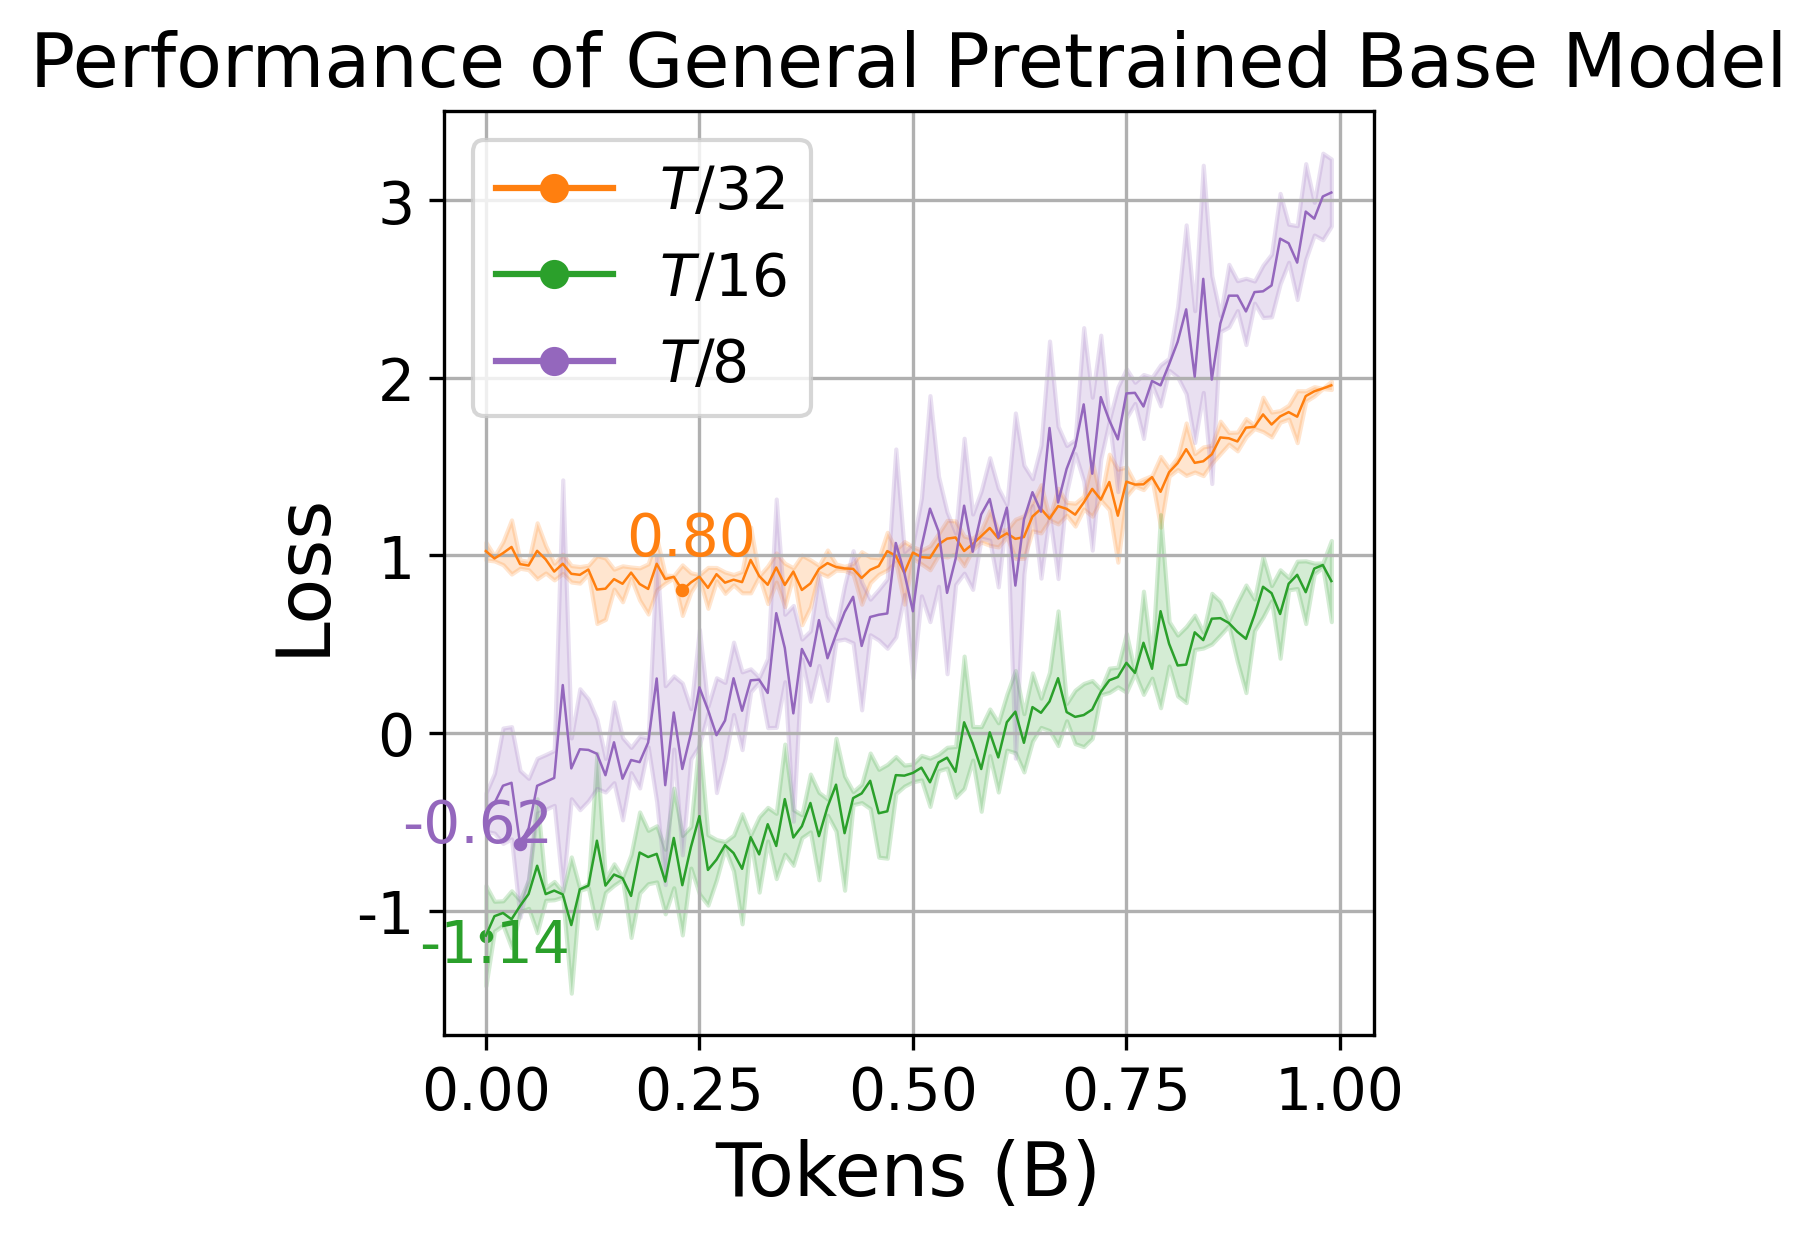

In [12]:
plot_dimensions = (1,1)
y_labels = [["Loss"]]
x_labels = [["Tokens (B)"]]
titles = [["Selected Token Loss"]]
titles = [["Performance of General Pretrained Base Model"]]
overall_format = {'figsize':(5,5),
    'style_size': style_size,
    'y_ticks': [[[[-1,0,1,2,3],[-1,0,1,2,3]]]],
    'has_grid': True, 
}

if style_size == 'presentation':
    overall_format['figsize'] = (4,4)

fig,ax = create_axes(plot_dimensions,overall_format,y_labels=y_labels,titles=titles,x_labels=x_labels)

line_format = {'color_palette': 'three_color_primary'}
plot_line(ax[0][0],[x_vals for i in range(len(y_vals))],y_vals+np.array(noise_vals),confidence_lengths,models,line_format)
plot_scatter(ax[0][0],[x_vals[np.argmin(y_vals[i]+noise_vals[i])] for i in range(len(models))],[np.min(y_vals[i]+noise_vals[i]) for i in range(len(models))],line_format)

for i in range(len(models)):
    text_format = {'color_palette': color_schemes['three_color_primary'][i], 'fontsize': 10}

    if style_size == 'presentation':
        text_format['fontsize'] = 14

    plot_text(ax[0][0],f'{np.min(y_vals[i]+noise_vals[i]):.2f}',x_vals[np.argmin(y_vals[i]+noise_vals[i])]+shifts[i][0],np.min(y_vals[i]+noise_vals[i]) + shifts[i][1],text_format)

legend_format = {'style_size': style_size,'type': 'is_local', 'loc': 'upper left', 'ncol': 1, 'bbox_to_anchor': None, 'show_point': True}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')

## Box and Whisker Plot

In [13]:
constrained = [np.random.normal(0.5,0.1) for i in range(100)]
unconstrained = [np.random.normal(0.75,0.2) for i in range(100)]

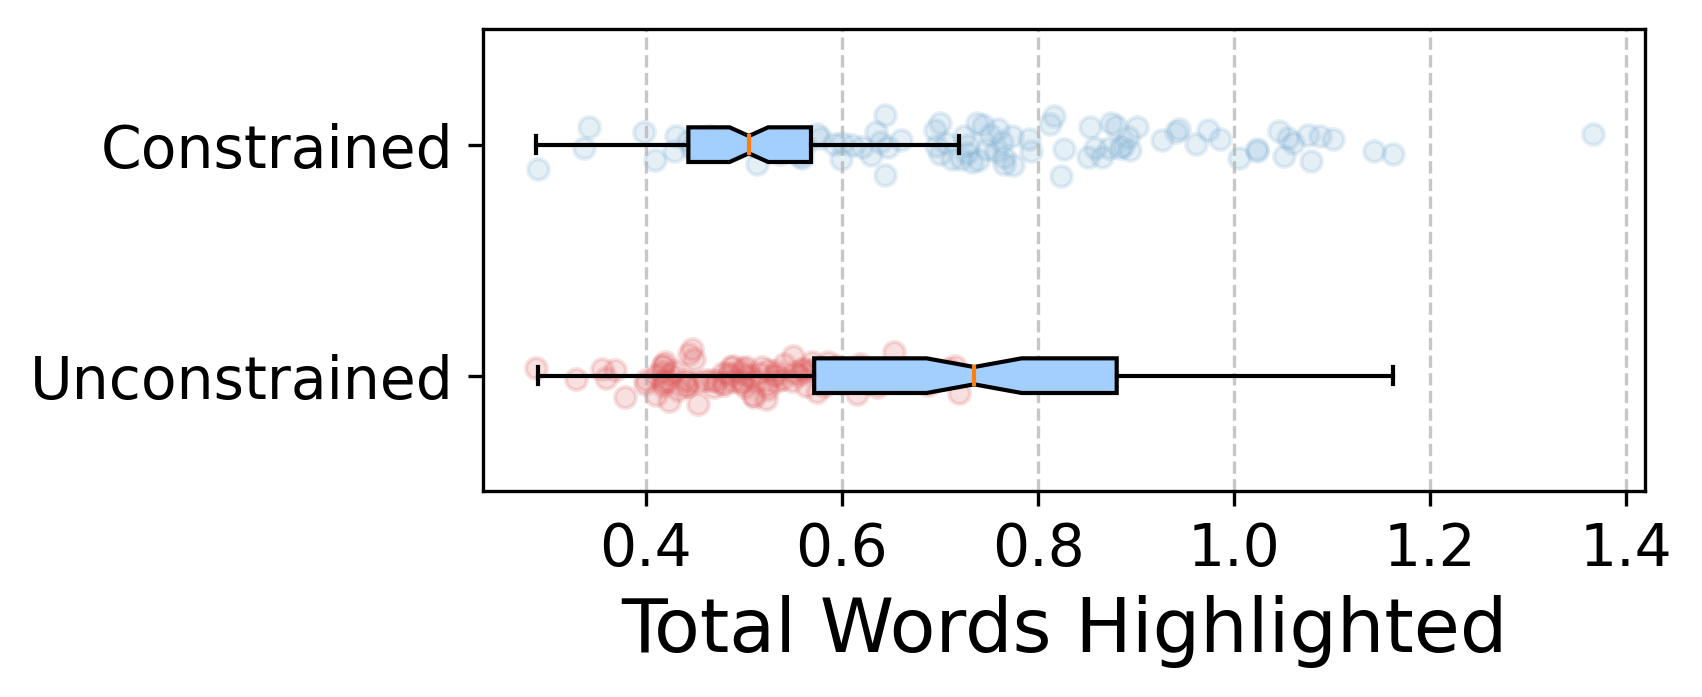

In [14]:
plot_dimensions = (1,1)
x_labels = [["Total Words Highlighted"]]
overall_format = {'figsize':(5,2),
    'style_size': style_size,
    'has_x_grid': True, 
}
fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels)

whisker_format = {'color_palette': '#a2cffe', 'style_size': style_size}
plot_box_whisker(ax[0][0],[constrained,unconstrained][::-1],["Constrained","Unconstrained"][::-1],whisker_format)

scatter_format = {'color_palette': 'two_color_blue_red_light', 'size': 25}
y_positions = [np.random.normal(i + 1, 0.05, size=len(constrained)) for i in range(2)]
plot_scatter(ax[0][0],[constrained,unconstrained][::-1],y_positions[::-1],scatter_format)

fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')

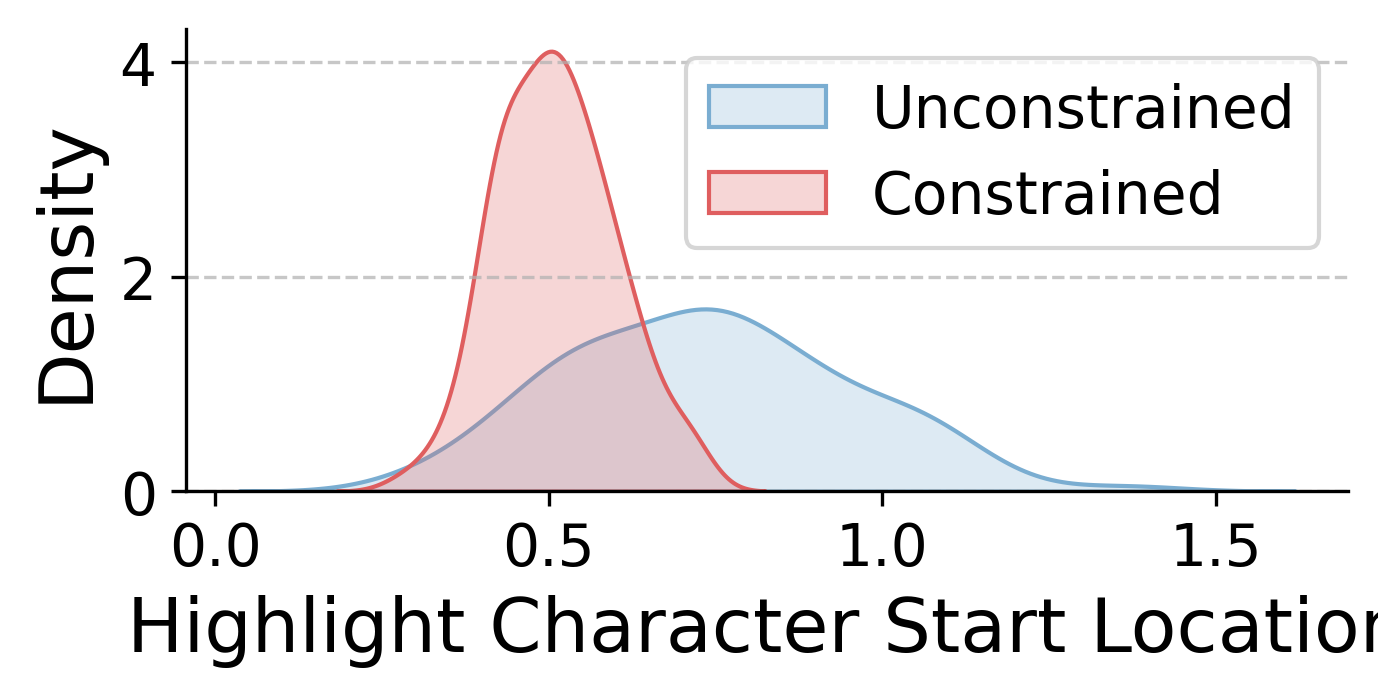

In [15]:
plot_dimensions = (1,1)
x_labels = [["Highlight Character Start Location"]]
y_labels = [["Density"]]
overall_format = {'figsize':(5,2),
    'style_size': style_size,
    'has_y_grid': True, 
    'hide_spines': True, 
    'y_ticks': [[[[0,2,4],[0,2,4]]]]
}
fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels)
kde_format = {'color_palette': 'two_color_blue_red_light'}
plot_kde(ax[0][0],[constrained,unconstrained][::-1],["Constrained","Unconstrained"][::-1],kde_format)

legend_format = {'style_size': style_size,'type': 'is_local', 'loc': 'upper right', 'ncol': 1, 'bbox_to_anchor': None}
create_legend(fig,ax,plot_dimensions,legend_format)

fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')

## State Map

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load Maryland shapefile or GeoJSON at ZIP code level
# Replace with the path to your Maryland ZIP code GeoJSON or shapefile
maryland_zipcodes = gpd.read_file("../../data/ct.geojson")

# Generate random data for each ZIP code
maryland_zipcodes["random_data"] = maryland_zipcodes["ZCTA5CE10"].astype(int)


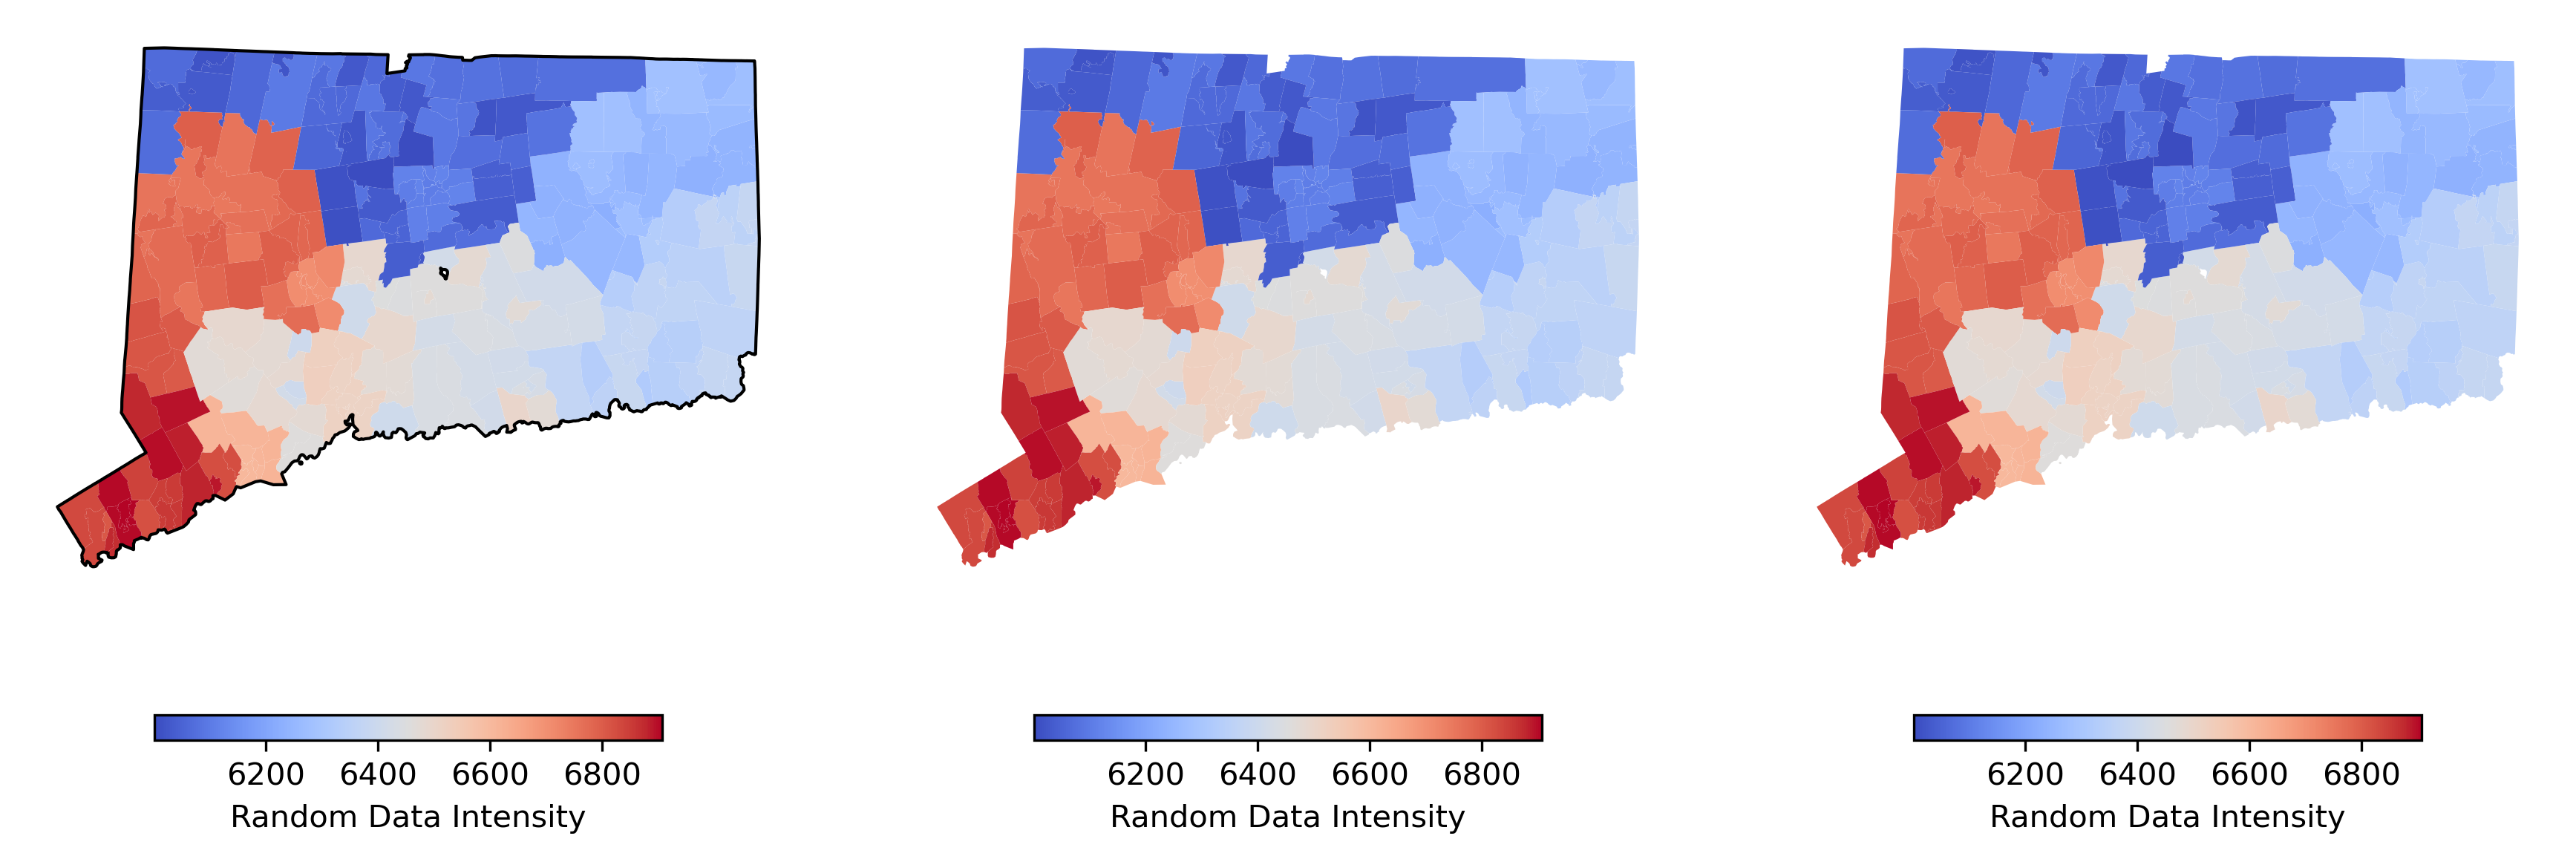

In [18]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
maryland_zipcodes.plot(column="random_data", 
                       cmap="coolwarm", 
                       legend=True, 
                        legend_kwds={
        'label': "Random Data Intensity",
        'orientation': "horizontal",   # Keep the legend vertical
        'shrink': 0.6,               # Shrink the legend's height
    },

                       ax=ax[0])

maryland_zipcodes.plot(column="random_data", 
                       cmap="coolwarm", 
                       legend=True, 
                        legend_kwds={
        'label': "Random Data Intensity",
        'orientation': "horizontal",   # Keep the legend vertical
        'shrink': 0.6,               # Shrink the legend's height
    },

                       ax=ax[1])

maryland_zipcodes.plot(column="random_data", 
                       cmap="coolwarm", 
                       legend=True, 
                        legend_kwds={
        'label': "Random Data Intensity",
        'orientation': "horizontal",   # Keep the legend vertical
        'shrink': 0.6,               # Shrink the legend's height
    },

                       ax=ax[2])

maryland_outline = maryland_zipcodes.dissolve()
maryland_outline.boundary.plot(ax=ax[0], color="black", linewidth=1)


# Enhance the plot
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

# Show the plot
plt.tight_layout()
fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')


In [28]:
x_values = [2,3,4,5]
dataset = 'sample_results'
methods = ['random','greedy','lp','group_based','gradient_descent_fast']
method_labels = ["Random","Greedy","Linear Programming","Group-Based","Gradient Descent"]
provider_y_values = [[] for i in range(len(methods))]
provider_y_confidences = [[] for i in range(len(methods))]
baseline_params = {'num_patients': 2}
for i in range(len(x_values)):
    baseline_params['num_providers'] = x_values[i] 

    results = get_results_matching_parameters(dataset,"",baseline_params)
    aggregate_data = aggregate_normalize_data(results,baseline="optimal")
    for method in range(len(method_labels)):
        provider_y_values[method].append(aggregate_data['{}_utilities'.format(methods[method])][0])
        provider_y_confidences[method].append(aggregate_data['{}_utilities'.format(methods[method])][1]/len(results)**.5)

In [33]:
patient_y_values = [[] for i in range(len(methods))]
patient_y_confidences = [[] for i in range(len(methods))]
baseline_params = {'num_providers': 2}
for i in range(len(x_values)):
    baseline_params['num_patients'] = x_values[i] 

    results = get_results_matching_parameters(dataset,"",baseline_params)
    aggregate_data = aggregate_normalize_data(results,baseline="optimal")
    for method in range(len(method_labels)):
        patient_y_values[method].append(aggregate_data['{}_utilities'.format(methods[method])][0])
        patient_y_confidences[method].append(aggregate_data['{}_utilities'.format(methods[method])][1]/len(results)**.5)

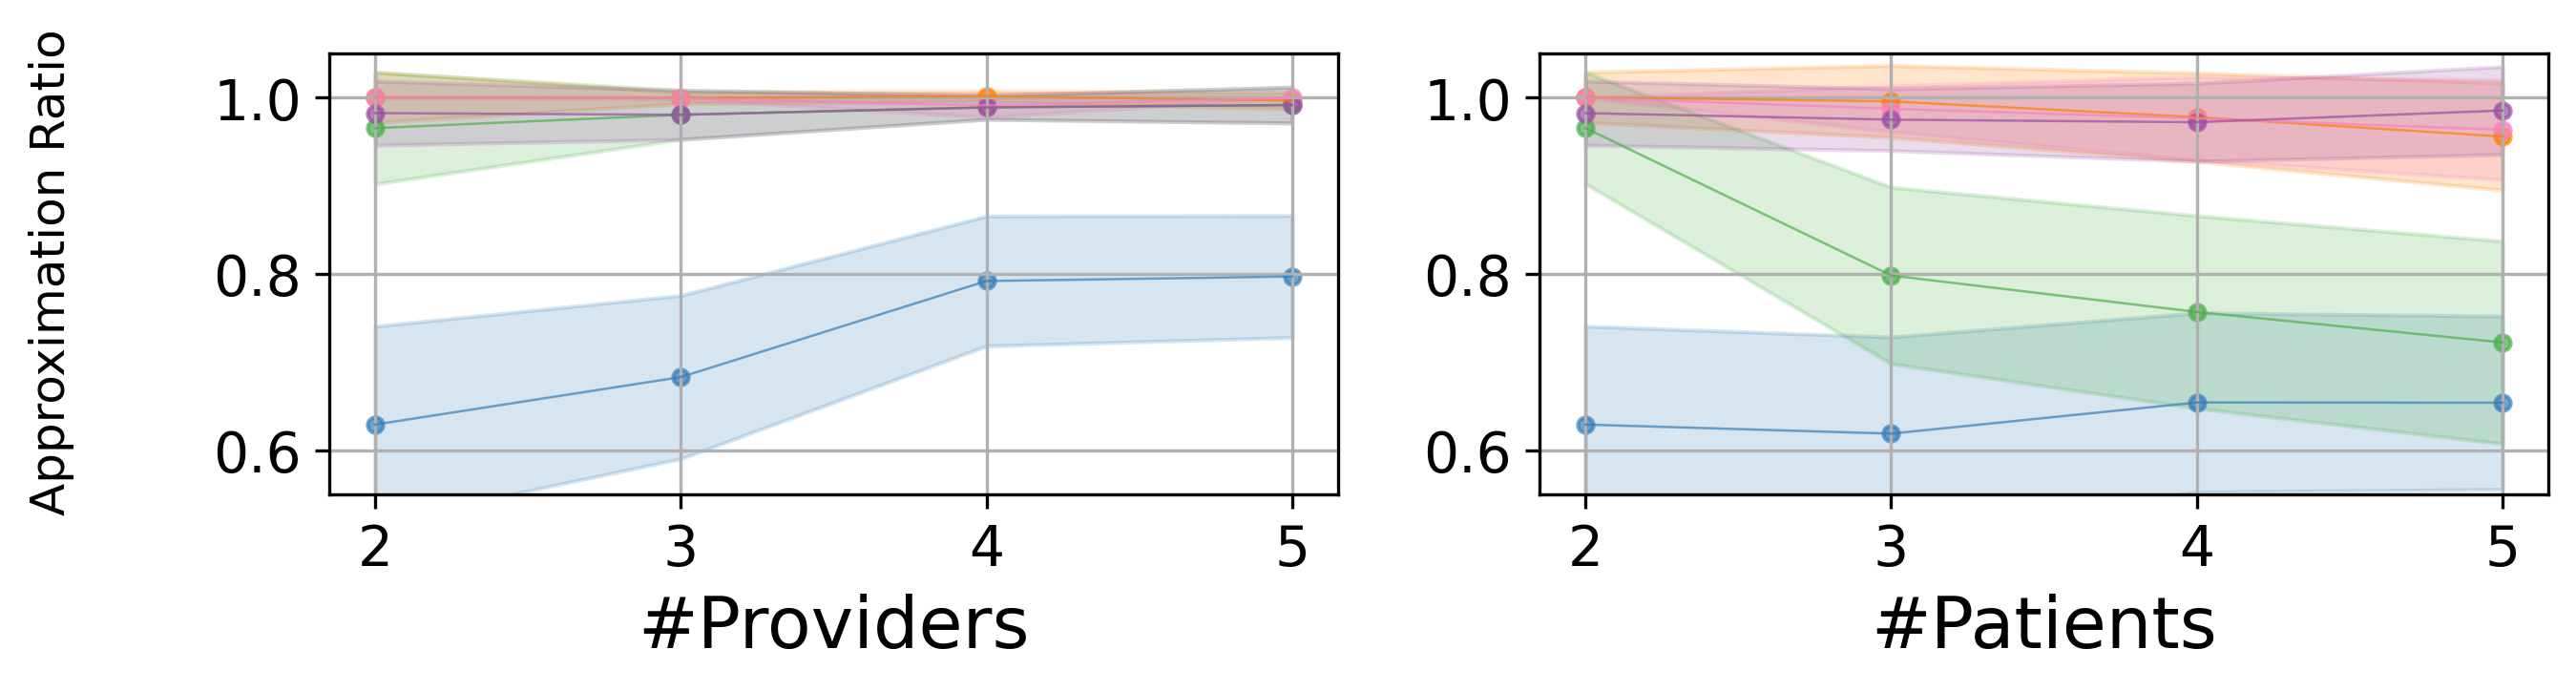

In [35]:
plot_dimensions = (1,2)
x_labels = [["#Providers","#Patients"]]
sup_y_label = "Approximation Ratio"
overall_format = {'figsize':(10,2),
    'style_size': style_size,
    'x_ticks': [[[[2,3,4,5],[2,3,4,5]],[[2,3,4,5],[2,3,4,5]]]],
    'y_ticks': [[[[0.6,0.8,1.0],[0.6,0.8,1.0]],[[0.6,0.8,1.0],[0.6,0.8,1.0]]]],
    'y_lim': [[[0.55,1.05],[0.55,1.05]]],
    'has_grid': True, 
}

fig,ax = create_axes(plot_dimensions,overall_format,x_labels=x_labels,sup_y_label=sup_y_label)

line_format = {'color_palette': 'six_color', 'size': 15}
plot_line(ax[0][0],[x_values for i in range(len(provider_y_values))],provider_y_values,provider_y_confidences,method_labels,line_format)
plot_scatter(ax[0][0],[x_values for i in range(len(provider_y_values))],provider_y_values,line_format)

plot_line(ax[0][1],[x_values for i in range(len(patient_y_values))],patient_y_values,patient_y_confidences,method_labels,line_format)
plot_scatter(ax[0][1],[x_values for i in range(len(patient_y_confidences))],patient_y_values,line_format)

legend_format = {'style_size': style_size,'type': 'is_global', 'loc': 'lower left', 'ncol': 5, 'bbox_to_anchor': (0.1,-0.34), 'show_point': True}
create_legend(fig,ax,plot_dimensions,legend_format)
fig.savefig("../../results/figures/temp.pdf",dpi=300, bbox_inches='tight')
